<a href="https://colab.research.google.com/github/shivam-01/Image-Classification-using-CNN/blob/master/Fashion_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Classifier using CNN



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Load the data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


4
[[  0   0   0   0   0   0   0   1   1   1   0   0  27 103 120 125  59   0
    0   1   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1   0   0  75 178 160 139 140 166  98
    0   0   0   1   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  81 175 183 157 150 131 131 164
   47   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0 156 194 219 149 157 194 167 193
  156   6   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 117 152 111 109 101  93  99 116
  160  21   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 158 176 116 159 119 126 136 144
  147  35   0   6   1   0   0   0   0   0]
 [  0   0   0   0   0   1   2   0   0  99 130 115 117 133 132 136 201 159
  156 115   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0  66 149 140 126 124 120 135 118 124 106
  133 143 145   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   1   0 123 133 127 153 109 148 104 

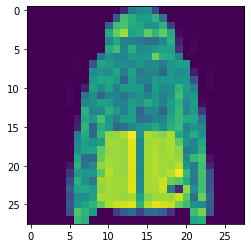

In [3]:
# Explore the data
plt.imshow(training_images[22])
print(training_labels[22])
print(training_images[22])

In [4]:
# Preprocess the data
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [5]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

# Compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(training_images, training_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 40s 5ms/step - loss: 0.4552 - accuracy: 0.8351
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3090 - accuracy: 0.8860
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2609 - accuracy: 0.9039
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2283 - accuracy: 0.9167
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2026 - accuracy: 0.9249
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1797 - accuracy: 0.9333
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1608 - accuracy: 0.9399
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1412 - accuracy: 0.9461
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1255 - accuracy: 0.9535
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.11

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5598 - accuracy: 0.9082


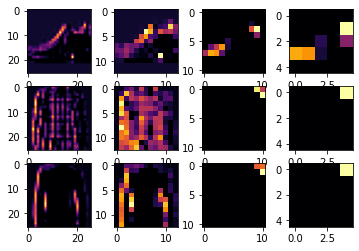

In [7]:
# Visualizing the Convolutions and Pooling
from tensorflow.keras import models
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [8]:
# Early Stopping

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4043 - accuracy: 0.8568
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.9031
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2234 - accuracy: 0.9179
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1910 - accuracy: 0.9293
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1650 - accuracy: 0.9392
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1399 - accuracy: 0.9472
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1188 - accuracy: 0.9552
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1024 - accuracy: 0.9615
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9680
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.076